In [4]:
####################
### Dependencies ###
####################

import requests as rq
from dotenv import load_dotenv
import os
import json
import pandas as pd
from io import StringIO
from IPython.display import display
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import sqlite3 as sql
import psycopg as pg
from dotenv import load_dotenv
import asyncio
import nest_asyncio
from scipy.stats import norm
import numpy as np

In [2]:
#####################
### General Setup ###
#####################

nest_asyncio.apply()
load_dotenv()

False

In [3]:
###########################
### Setup PostgreSQL DB ###
###########################

# Make a connection to the database
activateCon = lambda : pg.Connection.connect(os.getenv("DB_URI"), cursor_factory=pg.ClientCursor)
con = activateCon()
cur = con.cursor()

# Initialize transformed tables AFTER IMPORTING THE GEOJSON FILE
cur.execute('''
    CREATE EXTENSION postgis;

    CREATE TABLE jerryTransform AS
    SELECT
        ogc_fid AS id,
        ST_CollectionExtract(ST_MakeValid(ST_GeomFromWKB(wkb_geometry))) AS geo,
        substring(geoid from 1 for 2)::integer AS state,
        substring(geoid from 3 for 3)::integer AS county,
        votes_dem AS dem,
        votes_rep AS rep,
        votes_total AS tot
    FROM jerry;
''')
con.commit()
con.close()

AttributeError: 'NoneType' object has no attribute 'encode'

In [ ]:
con = activateCon()
cur = con.cursor()

cur.execute('''
    create table trans2 as
    select *, ST_ClusterKMeans(
            ST_Force4D(
                ST_Force3DZ(ST_GeneratePoints(geo, 1, (100000*random()+1)::int), 0.15*random()),
                mvalue => 100000*random() -- set clustering to be weighed by population
            ),
            880
        ) over () as cluster1
    from jerryTransform
    where state = 39;
''')

In [5]:
data = data = pd.DataFrame({"Red": np.random.normal(9, 1.5, 100), "Blue": np.random.normal(79, 1.5, 100)})

In [ ]:
data = con.execute("select create_layers('{{880, 5}, {88, 5}}', 25);")

con.commit()
con.close()

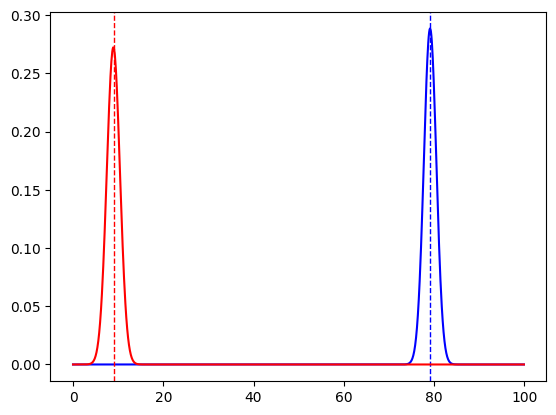

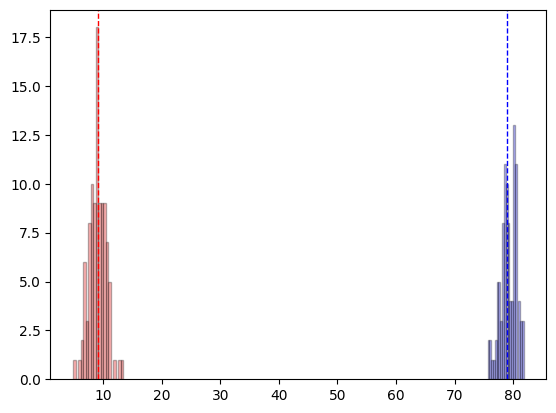

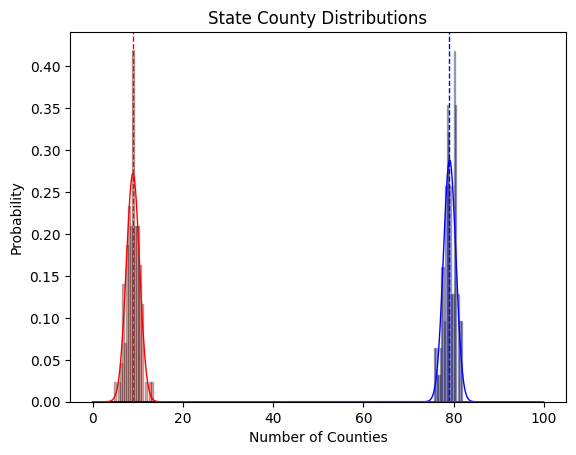

In [6]:


x_axis = np.arange(0, 100, 0.1)
bins = 20

blue_mean = data["Blue"].mean()
blue_std = data["Blue"].std()
actual_blue= 79    # placeholder

red_mean = data["Red"].mean()
red_std = data["Red"].std()
actual_red= 9    # placeholder

#normal distributions
plt.plot(x_axis, norm.pdf(x_axis, loc=blue_mean, scale=blue_std), color='b')
plt.axvline(x=actual_blue, color='b', linestyle='dashed', linewidth=1)
plt.plot(x_axis, norm.pdf(x_axis, loc=red_mean, scale=red_std), color='r')
plt.axvline(x=actual_red, color='r', linestyle='dashed', linewidth=1)
plt.figure()


#histogram plot
plt.axvline(x=actual_blue, color='b', linestyle='dashed', linewidth=1)
plt.axvline(x=actual_red, color='r', linestyle='dashed', linewidth=1)
plt.hist(data["Blue"], bins=bins, color='b', alpha=0.3, edgecolor='black')
plt.hist(data["Red"], bins=bins, color='r', alpha=0.3, edgecolor='black')
plt.figure()

#combined plot
plt.hist(data["Blue"], bins=bins, color='b', density=True, alpha=0.3, edgecolor='black')
plt.hist(data["Red"], bins=bins, color='r', density=True, alpha=0.3, edgecolor='black')
plt.plot(x_axis, norm.pdf(x_axis, loc=data["Blue"].mean(), scale=data["Blue"].std()), color='b', linewidth=1)
plt.axvline(x=actual_blue, color='b', linestyle='dashed', linewidth=1)
plt.plot(x_axis, norm.pdf(x_axis, loc=data["Red"].mean(), scale=data["Red"].std()), color='r', linewidth=1)
plt.axvline(x=actual_red, color='r', linestyle='dashed', linewidth=1)
plt.title("State County Distributions")
plt.xlabel("Number of Counties")
plt.ylabel("Probability")
plt.show()